# Aromatase Drug Discovery

Cael Yasutake

In this Jupyter Notebook I will be performing an exploratory data analysis on Aromatase proteins as an approach to breast cancer prevention and treatment.

Aromatase is a key protein involved in the proliferation of endocrine-responsive and -resistant breast cancers. It acts in the conversion of androstenedione and estrone into estrogen.

Since breast cancers rely heavily on estrogens for proliferation and survival, Aromatase inhibitors are a topic of discussion as preventatives and treatments for active and pre-active breast cancers.

Via the ChEMBL Database, I will be using machine learning models to predict the effectiveness of such inhibitors on Aromatase proteins.

## ChEMBL Database Search

In [29]:
! pip install chembl_webresource_client

In [30]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

### Target search for Aromatase

In [31]:
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


In [32]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

Retrieve bioactivity data for Aromatase, reported IC50 value

In [33]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [34]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...",CHEMBL341591,None,CHEMBL341591,5.15,0,http://www.openphacts.org/units/Nanomolar,267172,=,1,1,=,None,IC50,nM,None,7100.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,None,CHEMBL2111947,None,CHEMBL2111947,None,0,http://www.openphacts.org/units/Nanomolar,267163,>,1,1,>,None,IC50,nM,None,50000.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...",CHEMBL431859,None,CHEMBL431859,6.62,0,http://www.openphacts.org/units/Nanomolar,214178,=,1,1,=,None,IC50,nM,None,238.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...",CHEMBL113637,None,CHEMBL113637,7.24,0,http://www.openphacts.org/units/Nanomolar,214179,=,1,1,=,None,IC50,nM,None,57.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...",CHEMBL112021,None,CHEMBL112021,7.27,0,http://www.openphacts.org/units/Nanomolar,214173,=,1,1,=,None,IC50,nM,None,54.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889,None,22819795,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4716146,Inhibition of recombinant human aromatase incu...,B,None,None,BAO_0000179,BAO_0000357,single protein format,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,None,None,CHEMBL4715691,J Med Chem,2016.0,"{'bei': '21.60', 'le': '0.39', 'lle': '3.74', ...",CHEMBL4755831,None,CHEMBL4755831,8.28,0,None,3544612,=,1,1,=,None,IC50,nM,None,5.24,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,None,None,5.24
2890,None,22819796,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4716146,Inhibition of recombinant human aromatase incu...,B,None,None,BAO_0000179,BAO_0000357,single protein format,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,None,N

In [35]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [36]:
df.to_csv('bioactivity_aromatase_data.csv', index=False)

Drop missing values for standard_value column

In [37]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...",CHEMBL341591,None,CHEMBL341591,5.15,0,http://www.openphacts.org/units/Nanomolar,267172,=,1,1,=,None,IC50,nM,None,7100.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,None,CHEMBL2111947,None,CHEMBL2111947,None,0,http://www.openphacts.org/units/Nanomolar,267163,>,1,1,>,None,IC50,nM,None,50000.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...",CHEMBL431859,None,CHEMBL431859,6.62,0,http://www.openphacts.org/units/Nanomolar,214178,=,1,1,=,None,IC50,nM,None,238.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...",CHEMBL113637,None,CHEMBL113637,7.24,0,http://www.openphacts.org/units/Nanomolar,214179,=,1,1,=,None,IC50,nM,None,57.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...",CHEMBL112021,None,CHEMBL112021,7.27,0,http://www.openphacts.org/units/Nanomolar,214173,=,1,1,=,None,IC50,nM,None,54.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889,None,22819795,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4716146,Inhibition of recombinant human aromatase incu...,B,None,None,BAO_0000179,BAO_0000357,single protein format,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,None,None,CHEMBL4715691,J Med Chem,2016.0,"{'bei': '21.60', 'le': '0.39', 'lle': '3.74', ...",CHEMBL4755831,None,CHEMBL4755831,8.28,0,None,3544612,=,1,1,=,None,IC50,nM,None,5.24,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,None,None,5.24
2890,None,22819796,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4716146,Inhibition of recombinant human aromatase incu...,B,None,None,BAO_0000179,BAO_0000357,single protein format,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,None,N

## Data pre-processing of bioactivity data

### Compounds are labeled as either active, inactive, or intermediate

In [38]:
bioactivity_class = []
for i in df2.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")

### Iterate molecule_chembl_id, canonical_smiles, standard_value to lists and convert to dataframe

In [39]:
mol_cid = []
for i in df2.molecule_chembl_id:
    mol_cid.append(i)

In [40]:
canonical_smiles = []
for i in df2.canonical_smiles:
    canonical_smiles.append(i)

In [41]:
standard_value = []
for i in df2.standard_value:
    standard_value.append(i)

In [42]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame(data_tuples, columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,54.0
...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,5.24
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,104.0
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,17.7
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,60.4


In [43]:
df3.to_csv('bioactivity_preprocessed_aromatase_data.csv', index=False)

## Descriptor Calculation and Exploratory Data Analysis

In [44]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np

In [45]:
df = pd.read_csv('bioactivity_preprocessed_aromatase_data.csv')

In [46]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [47]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2813,383.451,4.53580,3.0,5.0
2814,384.439,3.93080,3.0,6.0
2815,384.439,3.93080,3.0,6.0
2816,384.435,4.65920,3.0,5.0


In [48]:
df_combined = pd.concat([df,df_lipinski], axis=1)
pd.set_option('display.max_columns', None)
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,7100.00,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,50000.00,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,238.00,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,57.00,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,54.00,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,5.24,383.451,4.53580,3.0,5.0
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,104.00,384.439,3.93080,3.0,6.0
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,17.70,384.439,3.93080,3.0,6.0
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,60.40,384.435,4.65920,3.0,5.0


### Convert IC50 to pIC50

In [49]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [50]:
df_combined.standard_value.describe()

count    2.818000e+03
mean     2.229110e+10
std      7.327166e+11
min      0.000000e+00
25%      1.052500e+02
50%      1.049000e+03
75%      7.465000e+03
max      3.388442e+13
Name: standard_value, dtype: float64

In [51]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [52]:
df_norm = norm_value(df_combined)
df_norm

/var/folders/t9/bz35l7d13rq7vfnm9vz97v0c0000gn/T/ipykernel_35704/3777778642.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.00
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.00
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.00
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.00
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.00
...,...,...,...,...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,383.451,4.53580,3.0,5.0,5.24
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,104.00
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,17.70
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,384.435,4.65920,3.0,5.0,60.40


In [53]:
df_norm.standard_value_norm.describe()

count    2.818000e+03
mean     3.269816e+05
std      5.013383e+06
min      0.000000e+00
25%      1.052500e+02
50%      1.049000e+03
75%      7.465000e+03
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [54]:
df_final = pIC50(df_norm)
df_final

/var/folders/t9/bz35l7d13rq7vfnm9vz97v0c0000gn/T/ipykernel_35704/3442786292.py:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
/var/folders/t9/bz35l7d13rq7vfnm9vz97v0c0000gn/T/ipykernel_35704/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,383.451,4.53580,3.0,5.0,8.280669
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,6.982967
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,7.752027
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,384.435,4.65920,3.0,5.0,7.218963


In [55]:
df_final.pIC50.describe()

count    2818.000000
mean             inf
std              NaN
min         1.000000
25%         5.126970
50%         5.979240
75%         6.977782
max              inf
Name: pIC50, dtype: float64

### Remove 'intermediate' bioactivity class

In [56]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,383.451,4.53580,3.0,5.0,8.280669
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,6.982967
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,7.752027
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,384.435,4.65920,3.0,5.0,7.218963


## Chemical Space Analysis via Lipinski descriptors

In [57]:
! pip install seaborn

In [58]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of 'inactive' and 'active' classes

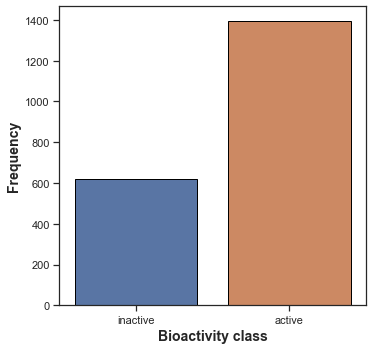

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot of Molecular Weight versus LogP

/Users/caelyasutake/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/matplotlib/colors.py:1254: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/Users/caelyasutake/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/matplotlib/colors.py:1254: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


ValueError: Can only output finite numbers in PDF

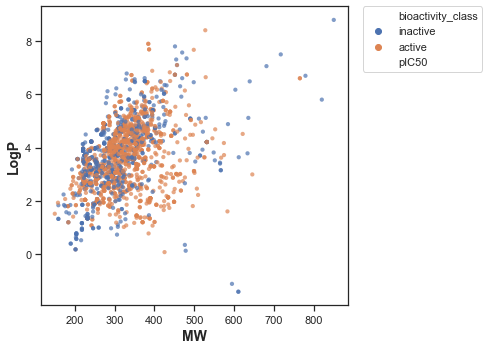

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### Statistical Analysis : Mann-Whitney U Test

In [61]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

### pIC50 Box Plot

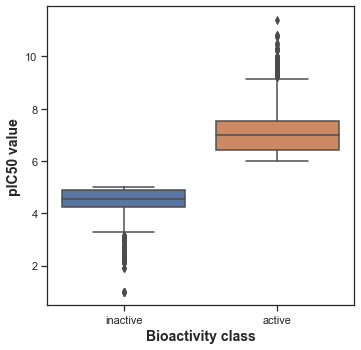

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [63]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,868934.0,1.237955e-282,0.05,Different distribution (reject H0)


### Molar Weight Box Plot

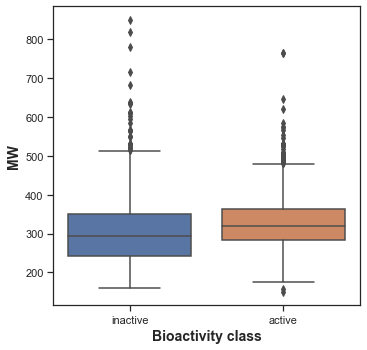

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [65]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,512474.5,1.118551e-10,0.05,Different distribution (reject H0)


### LogP

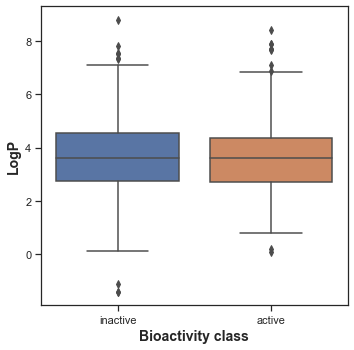

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [67]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,428572.5,0.626015,0.05,Same distribution (fail to reject H0)


### Number of Hydrogen Donors

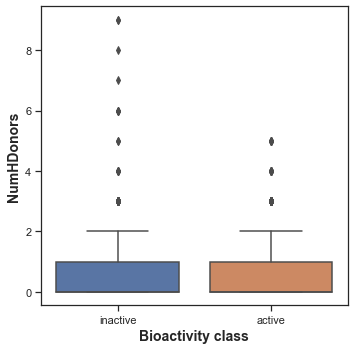

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [69]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,391920.0,0.000051,0.05,Different distribution (reject H0)


### Number of Hydrogen Acceptors

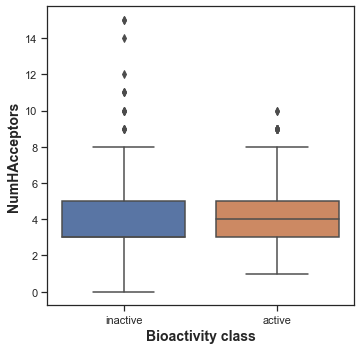

In [70]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [71]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,502380.0,1.045942e-08,0.05,Different distribution (reject H0)


### Interpretation of Statistical Results

#### Lipinski's Descriptors

Out of the 4 Lipinski's descriptors (MW, LogP, Number of Hydrogen Donors, and Number of Hydrogen Acceptors), only LogP failed to reject H0 (null hypothesis) and displayed to statistical significance difference between actives and inactives. The other descriptors each showed a statistical significant difference between actives and inactives.

According to this data, the inhibitors displayed orally taken drug properties, passing at least 3 of the Lipinski's descriptors.

In [73]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: bioactivity_preprocessed_aromatase_data.csv (deflated 83%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 12%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: bioactivity_aromatase_data.csv (deflated 90%)


## Descriptor Calculation and Dataset Preparation

In [72]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2022-07-03 12:50:36--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-07-03 12:50:37--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  6.80MB/s    in 3.6s    

2022-07-03 12:50:42 (6.80 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-07-03 12:50:42--  https://g

  inflating: __MACOSX/PaDEL-Descriptor/lib/._jama(7).jar  
  inflating: PaDEL-Descriptor/lib/ambit2-core-2.4.7-SNAPSHOT.jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._ambit2-core-2.4.7-SNAPSHOT.jar  
  inflating: PaDEL-Descriptor/lib/commons-cli-1.2(6).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._commons-cli-1.2(6).jar  
  inflating: PaDEL-Descriptor/lib/libPaDEL-Descriptor(1).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._libPaDEL-Descriptor(1).jar  
  inflating: PaDEL-Descriptor/lib/jama(4).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._jama(4).jar  
  inflating: PaDEL-Descriptor/lib/libPaDEL-Jobs(2).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._libPaDEL-Jobs(2).jar  
  inflating: PaDEL-Descriptor/lib/ambit2-smarts-2.4.7-SNAPSHOT(3).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._ambit2-smarts-2.4.7-SNAPSHOT(3).jar  
  inflating: PaDEL-Descriptor/lib/ambit2-smarts-2.4.7-SNAPSHOT(2).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._ambit2-smarts-2.4.7-SNAPSH

In [83]:
df_2class['Unnamed: 0'] = np.arange(df_2class.shape[0])
df3 = df_2class
df3

/var/folders/t9/bz35l7d13rq7vfnm9vz97v0c0000gn/T/ipykernel_35704/51818832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2class['Unnamed: 0'] = np.arange(df_2class.shape[0])


,molecule_chembl_id,canonical_smiles,Unnamed: 0,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,0,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,1,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,2,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,3,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,4,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,2014,active,383.451,4.53580,3.0,5.0,8.280669
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,2015,active,384.439,3.93080,3.0,6.0,6.982967
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,2016,active,384.439,3.93080,3.0,6.0,7.752027
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,2017,active,384.435,4.65920,3.0,5.0,7.218963


In [85]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [86]:
! cat molecule.smi | head -5
! cat molecule.smi | wc -l

C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021
CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21	CHEMBL41761
    2019


### Calculate PaDEL fingerprint descriptors

In [87]:
! cat padel.sh
! bash padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv
Processing CHEMBL2111947 in molecule.smi (1/2019). 
Processing CHEMBL111888 in molecule.smi (7/2019). 
Processing CHEMBL112074 in molecule.smi (8/2019). 
Processing CHEMBL431859 in molecule.smi (2/2019). 
Processing CHEMBL113637 in molecule.smi (3/2019). 
Processing CHEMBL112021 in molecule.smi (4/2019). 
Processing CHEMBL41761 in molecule.smi (5/2019). 
Processing CHEMBL111868 in molecule.smi (6/2019). 
Processing CHEMBL1629805 in molecule.smi (15/2019). Average speed: 4.38 s/mol.
Processing CHEMBL424556 in molecule.smi (12/2019). Average speed: 4.36 s/mol.
Processing CHEMBL169251 in molecule.smi (14/2019). Average speed: 4.38 s/mol.
Processing CHEMBL166709 in molecule.smi (11/2019). Average speed: 4.36 s/mol.
Processing CHEMBL353068 in molecule.smi (10/2019

Processing CHEMBL31456 in molecule.smi (108/2019). Average speed: 0.10 s/mol.
Processing CHEMBL350074 in molecule.smi (110/2019). Average speed: 0.10 s/mol.
Processing CHEMBL31215 in molecule.smi (109/2019). Average speed: 0.10 s/mol.
Processing CHEMBL166032 in molecule.smi (111/2019). Average speed: 0.10 s/mol.
Processing CHEMBL164543 in molecule.smi (112/2019). Average speed: 0.10 s/mol.
Processing CHEMBL82981 in molecule.smi (113/2019). Average speed: 0.10 s/mol.
Processing CHEMBL165552 in molecule.smi (114/2019). Average speed: 0.10 s/mol.
Processing CHEMBL1629804 in molecule.smi (115/2019). Average speed: 0.10 s/mol.
Processing CHEMBL285809 in molecule.smi (116/2019). Average speed: 0.10 s/mol.
Processing CHEMBL166148 in molecule.smi (118/2019). Average speed: 0.10 s/mol.
Processing CHEMBL351850 in molecule.smi (117/2019). Average speed: 0.10 s/mol.
Processing CHEMBL287677 in molecule.smi (119/2019). Average speed: 0.10 s/mol.
Processing CHEMBL31224 in molecule.smi (120/2019). Ave

Processing CHEMBL336383 in molecule.smi (213/2019). Average speed: 0.07 s/mol.
Processing CHEMBL133240 in molecule.smi (214/2019). Average speed: 0.07 s/mol.
Processing CHEMBL132563 in molecule.smi (215/2019). Average speed: 0.07 s/mol.
Processing CHEMBL130546 in molecule.smi (216/2019). Average speed: 0.07 s/mol.
Processing CHEMBL176452 in molecule.smi (217/2019). Average speed: 0.07 s/mol.
Processing CHEMBL176452 in molecule.smi (218/2019). Average speed: 0.07 s/mol.
Processing CHEMBL174308 in molecule.smi (219/2019). Average speed: 0.07 s/mol.
Processing CHEMBL174407 in molecule.smi (220/2019). Average speed: 0.07 s/mol.
Processing CHEMBL174407 in molecule.smi (221/2019). Average speed: 0.07 s/mol.
Processing CHEMBL368631 in molecule.smi (222/2019). Average speed: 0.07 s/mol.
Processing CHEMBL368631 in molecule.smi (223/2019). Average speed: 0.07 s/mol.
Processing CHEMBL26651 in molecule.smi (224/2019). Average speed: 0.07 s/mol.
Processing CHEMBL26651 in molecule.smi (225/2019). Av

Processing CHEMBL330452 in molecule.smi (319/2019). Average speed: 0.06 s/mol.
Processing CHEMBL1394757 in molecule.smi (320/2019). Average speed: 0.06 s/mol.
Processing CHEMBL151212 in molecule.smi (321/2019). Average speed: 0.06 s/mol.
Processing CHEMBL488 in molecule.smi (322/2019). Average speed: 0.06 s/mol.
Processing CHEMBL151691 in molecule.smi (323/2019). Average speed: 0.06 s/mol.
Processing CHEMBL151691 in molecule.smi (324/2019). Average speed: 0.06 s/mol.
Processing CHEMBL70901 in molecule.smi (325/2019). Average speed: 0.06 s/mol.
Processing CHEMBL70901 in molecule.smi (326/2019). Average speed: 0.06 s/mol.
Processing CHEMBL149238 in molecule.smi (327/2019). Average speed: 0.06 s/mol.
Processing CHEMBL149238 in molecule.smi (328/2019). Average speed: 0.06 s/mol.
Processing CHEMBL148903 in molecule.smi (329/2019). Average speed: 0.06 s/mol.
Processing CHEMBL148903 in molecule.smi (330/2019). Average speed: 0.06 s/mol.
Processing CHEMBL95919 in molecule.smi (331/2019). Avera

Processing CHEMBL177268 in molecule.smi (426/2019). Average speed: 0.06 s/mol.
Processing CHEMBL176009 in molecule.smi (427/2019). Average speed: 0.06 s/mol.
Processing CHEMBL176076 in molecule.smi (428/2019). Average speed: 0.05 s/mol.
Processing CHEMBL176287 in molecule.smi (429/2019). Average speed: 0.05 s/mol.
Processing CHEMBL369623 in molecule.smi (430/2019). Average speed: 0.05 s/mol.
Processing CHEMBL9298 in molecule.smi (431/2019). Average speed: 0.05 s/mol.
Processing CHEMBL179149 in molecule.smi (432/2019). Average speed: 0.05 s/mol.
Processing CHEMBL360026 in molecule.smi (433/2019). Average speed: 0.05 s/mol.
Processing CHEMBL179144 in molecule.smi (434/2019). Average speed: 0.05 s/mol.
Processing CHEMBL184952 in molecule.smi (437/2019). Average speed: 0.05 s/mol.
Processing CHEMBL175979 in molecule.smi (436/2019). Average speed: 0.05 s/mol.
Processing CHEMBL366773 in molecule.smi (435/2019). Average speed: 0.05 s/mol.
Processing CHEMBL187185 in molecule.smi (438/2019). Av

Processing CHEMBL377766 in molecule.smi (531/2019). Average speed: 0.05 s/mol.
Processing CHEMBL213588 in molecule.smi (533/2019). Average speed: 0.05 s/mol.
Processing CHEMBL213588 in molecule.smi (532/2019). Average speed: 0.05 s/mol.
Processing CHEMBL213587 in molecule.smi (534/2019). Average speed: 0.05 s/mol.
Processing CHEMBL212168 in molecule.smi (535/2019). Average speed: 0.05 s/mol.
Processing CHEMBL212168 in molecule.smi (536/2019). Average speed: 0.05 s/mol.
Processing CHEMBL158635 in molecule.smi (537/2019). Average speed: 0.05 s/mol.
Processing CHEMBL158635 in molecule.smi (538/2019). Average speed: 0.05 s/mol.
Processing CHEMBL213587 in molecule.smi (539/2019). Average speed: 0.05 s/mol.
Processing CHEMBL377766 in molecule.smi (540/2019). Average speed: 0.05 s/mol.
Processing CHEMBL209731 in molecule.smi (541/2019). Average speed: 0.05 s/mol.
Processing CHEMBL376473 in molecule.smi (542/2019). Average speed: 0.05 s/mol.
Processing CHEMBL222250 in molecule.smi (543/2019). 

Processing CHEMBL229944 in molecule.smi (635/2019). Average speed: 0.05 s/mol.
Processing CHEMBL488 in molecule.smi (636/2019). Average speed: 0.05 s/mol.
Processing CHEMBL228985 in molecule.smi (637/2019). Average speed: 0.05 s/mol.
Processing CHEMBL390364 in molecule.smi (638/2019). Average speed: 0.05 s/mol.
Processing CHEMBL229907 in molecule.smi (639/2019). Average speed: 0.05 s/mol.
Processing CHEMBL1162951 in molecule.smi (641/2019). Average speed: 0.05 s/mol.
Processing CHEMBL229905 in molecule.smi (640/2019). Average speed: 0.05 s/mol.
Processing CHEMBL388375 in molecule.smi (642/2019). Average speed: 0.05 s/mol.
Processing CHEMBL229633 in molecule.smi (643/2019). Average speed: 0.05 s/mol.
Processing CHEMBL229841 in molecule.smi (644/2019). Average speed: 0.05 s/mol.
Processing CHEMBL229790 in molecule.smi (645/2019). Average speed: 0.05 s/mol.
Processing CHEMBL390731 in molecule.smi (646/2019). Average speed: 0.05 s/mol.
Processing CHEMBL389925 in molecule.smi (647/2019). Av

Processing CHEMBL442813 in molecule.smi (740/2019). Average speed: 0.05 s/mol.
Processing CHEMBL227113 in molecule.smi (741/2019). Average speed: 0.05 s/mol.
Processing CHEMBL512578 in molecule.smi (742/2019). Average speed: 0.05 s/mol.
Processing CHEMBL463435 in molecule.smi (743/2019). Average speed: 0.05 s/mol.
Processing CHEMBL463241 in molecule.smi (744/2019). Average speed: 0.05 s/mol.
Processing CHEMBL394855 in molecule.smi (745/2019). Average speed: 0.05 s/mol.
Processing CHEMBL253467 in molecule.smi (746/2019). Average speed: 0.05 s/mol.
Processing CHEMBL464428 in molecule.smi (747/2019). Average speed: 0.05 s/mol.
Processing CHEMBL115452 in molecule.smi (748/2019). Average speed: 0.05 s/mol.
Processing CHEMBL465845 in molecule.smi (749/2019). Average speed: 0.05 s/mol.
Processing CHEMBL464472 in molecule.smi (750/2019). Average speed: 0.05 s/mol.
Processing CHEMBL463454 in molecule.smi (751/2019). Average speed: 0.05 s/mol.
Processing CHEMBL463453 in molecule.smi (752/2019). 

Processing CHEMBL362906 in molecule.smi (844/2019). Average speed: 0.05 s/mol.
Processing CHEMBL522733 in molecule.smi (845/2019). Average speed: 0.05 s/mol.
Processing CHEMBL450666 in molecule.smi (847/2019). Average speed: 0.05 s/mol.
Processing CHEMBL482693 in molecule.smi (846/2019). Average speed: 0.05 s/mol.
Processing CHEMBL476126 in molecule.smi (848/2019). Average speed: 0.05 s/mol.
Processing CHEMBL424414 in molecule.smi (849/2019). Average speed: 0.05 s/mol.
Processing CHEMBL60376 in molecule.smi (850/2019). Average speed: 0.05 s/mol.
Processing CHEMBL453417 in molecule.smi (851/2019). Average speed: 0.05 s/mol.
Processing CHEMBL503538 in molecule.smi (852/2019). Average speed: 0.05 s/mol.
Processing CHEMBL493174 in molecule.smi (853/2019). Average speed: 0.05 s/mol.
Processing CHEMBL454226 in molecule.smi (854/2019). Average speed: 0.05 s/mol.
Processing CHEMBL493181 in molecule.smi (855/2019). Average speed: 0.05 s/mol.
Processing CHEMBL490867 in molecule.smi (856/2019). A

Processing CHEMBL599238 in molecule.smi (952/2019). Average speed: 0.05 s/mol.
Processing CHEMBL597403 in molecule.smi (953/2019). Average speed: 0.05 s/mol.
Processing CHEMBL598199 in molecule.smi (951/2019). Average speed: 0.05 s/mol.
Processing CHEMBL598009 in molecule.smi (954/2019). Average speed: 0.05 s/mol.
Processing CHEMBL598628 in molecule.smi (955/2019). Average speed: 0.05 s/mol.
Processing CHEMBL599442 in molecule.smi (956/2019). Average speed: 0.05 s/mol.
Processing CHEMBL592376 in molecule.smi (957/2019). Average speed: 0.05 s/mol.
Processing CHEMBL598629 in molecule.smi (958/2019). Average speed: 0.05 s/mol.
Processing CHEMBL598627 in molecule.smi (959/2019). Average speed: 0.05 s/mol.
Processing CHEMBL609618 in molecule.smi (960/2019). Average speed: 0.05 s/mol.
Processing CHEMBL286738 in molecule.smi (961/2019). Average speed: 0.05 s/mol.
Processing CHEMBL598211 in molecule.smi (962/2019). Average speed: 0.05 s/mol.
Processing CHEMBL592852 in molecule.smi (963/2019). 

Processing CHEMBL87477 in molecule.smi (1056/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1173129 in molecule.smi (1057/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1171680 in molecule.smi (1058/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1170678 in molecule.smi (1060/2019). Average speed: 0.04 s/mol.
Processing CHEMBL162549 in molecule.smi (1059/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1170893 in molecule.smi (1061/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1172882 in molecule.smi (1062/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1173259 in molecule.smi (1063/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1171991 in molecule.smi (1064/2019). Average speed: 0.04 s/mol.
Processing CHEMBL157101 in molecule.smi (1066/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1172842 in molecule.smi (1065/2019). Average speed: 0.04 s/mol.
Processing CHEMBL254328 in molecule.smi (1067/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1173327 in molec

Processing CHEMBL488513 in molecule.smi (1159/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1668326 in molecule.smi (1160/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1668327 in molecule.smi (1161/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1668328 in molecule.smi (1162/2019). Average speed: 0.04 s/mol.
Processing CHEMBL488848 in molecule.smi (1163/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1668329 in molecule.smi (1164/2019). Average speed: 0.04 s/mol.
Processing CHEMBL108425 in molecule.smi (1165/2019). Average speed: 0.04 s/mol.
Processing CHEMBL430879 in molecule.smi (1166/2019). Average speed: 0.04 s/mol.
Processing CHEMBL108483 in molecule.smi (1167/2019). Average speed: 0.04 s/mol.
Processing CHEMBL598199 in molecule.smi (1168/2019). Average speed: 0.04 s/mol.
Processing CHEMBL592131 in molecule.smi (1169/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1672974 in molecule.smi (1170/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1672975 in molecul

Processing CHEMBL1824754 in molecule.smi (1261/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824756 in molecule.smi (1262/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824757 in molecule.smi (1263/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824758 in molecule.smi (1264/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824759 in molecule.smi (1265/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824760 in molecule.smi (1266/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824761 in molecule.smi (1267/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824762 in molecule.smi (1268/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824763 in molecule.smi (1269/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824764 in molecule.smi (1270/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824765 in molecule.smi (1271/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824766 in molecule.smi (1272/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1824767 in 

Processing CHEMBL1957218 in molecule.smi (1364/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1957223 in molecule.smi (1365/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1399 in molecule.smi (1368/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1444 in molecule.smi (1367/2019). Average speed: 0.04 s/mol.
Processing CHEMBL165 in molecule.smi (1366/2019). Average speed: 0.04 s/mol.
Processing CHEMBL9298 in molecule.smi (1369/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1399 in molecule.smi (1370/2019). Average speed: 0.04 s/mol.
Processing CHEMBL131921 in molecule.smi (1371/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2011191 in molecule.smi (1372/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2011192 in molecule.smi (1373/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2011193 in molecule.smi (1374/2019). Average speed: 0.04 s/mol.
Processing CHEMBL274826 in molecule.smi (1375/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2011171 in molecule.smi (1376

Processing CHEMBL2333327 in molecule.smi (1466/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2333326 in molecule.smi (1467/2019). Average speed: 0.04 s/mol.
Processing CHEMBL78322 in molecule.smi (1468/2019). Average speed: 0.04 s/mol.
Processing CHEMBL307160 in molecule.smi (1469/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1444 in molecule.smi (1470/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2336855 in molecule.smi (1471/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2336854 in molecule.smi (1472/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2336853 in molecule.smi (1473/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2336852 in molecule.smi (1474/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2336851 in molecule.smi (1475/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2336850 in molecule.smi (1476/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2336849 in molecule.smi (1477/2019). Average speed: 0.04 s/mol.
Processing CHEMBL2336848 in molecu

Processing CHEMBL1688891 in molecule.smi (1568/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1688893 in molecule.smi (1569/2019). Average speed: 0.04 s/mol.
Processing CHEMBL225499 in molecule.smi (1570/2019). Average speed: 0.04 s/mol.
Processing CHEMBL437731 in molecule.smi (1571/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3099695 in molecule.smi (1572/2019). Average speed: 0.04 s/mol.
Processing CHEMBL9298 in molecule.smi (1573/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3315157 in molecule.smi (1574/2019). Average speed: 0.04 s/mol.
Processing CHEMBL465881 in molecule.smi (1575/2019). Average speed: 0.04 s/mol.
Processing CHEMBL9298 in molecule.smi (1576/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1200374 in molecule.smi (1577/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3407539 in molecule.smi (1578/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3407538 in molecule.smi (1579/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3407536 in molecule.

Processing CHEMBL597808 in molecule.smi (1672/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1399 in molecule.smi (1673/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3622069 in molecule.smi (1674/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3622070 in molecule.smi (1675/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3622071 in molecule.smi (1676/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3622072 in molecule.smi (1677/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3622073 in molecule.smi (1678/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3622075 in molecule.smi (1679/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3622076 in molecule.smi (1680/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3622077 in molecule.smi (1681/2019). Average speed: 0.04 s/mol.
Processing CHEMBL108425 in molecule.smi (1682/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3623218 in molecule.smi (1683/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3623217 in molec

Processing CHEMBL3805149 in molecule.smi (1775/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3805048 in molecule.smi (1776/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3806185 in molecule.smi (1777/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3804993 in molecule.smi (1778/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3805657 in molecule.smi (1779/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3805008 in molecule.smi (1780/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3805388 in molecule.smi (1781/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3806075 in molecule.smi (1782/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3805820 in molecule.smi (1783/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3805539 in molecule.smi (1784/2019). Average speed: 0.04 s/mol.
Processing CHEMBL3805733 in molecule.smi (1785/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1444 in molecule.smi (1786/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1784801 in mol

Processing CHEMBL4161789 in molecule.smi (1877/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4176600 in molecule.smi (1878/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4165988 in molecule.smi (1879/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4161492 in molecule.smi (1880/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4169419 in molecule.smi (1881/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4169808 in molecule.smi (1882/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4159159 in molecule.smi (1883/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4173231 in molecule.smi (1884/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4162931 in molecule.smi (1885/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4170868 in molecule.smi (1886/2019). Average speed: 0.04 s/mol.
Processing CHEMBL1424243 in molecule.smi (1887/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4204862 in molecule.smi (1888/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4207850 in 

Processing CHEMBL4592407 in molecule.smi (1979/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4574913 in molecule.smi (1980/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4514474 in molecule.smi (1981/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4526798 in molecule.smi (1982/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4564168 in molecule.smi (1983/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4568674 in molecule.smi (1984/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4575939 in molecule.smi (1985/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4536893 in molecule.smi (1986/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4547558 in molecule.smi (1987/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4547558 in molecule.smi (1988/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4575939 in molecule.smi (1990/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4536893 in molecule.smi (1989/2019). Average speed: 0.04 s/mol.
Processing CHEMBL4568674 in 

### X and Y Data Matrix preparation

In [89]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP315,P

In [90]:
df3_Y = df3['pIC50']
df3_Y

1       4.301030
2       6.623423
3       7.244125
4       7.267606
6       7.387216
          ...   
2813    8.280669
2814    6.982967
2815    7.752027
2816    7.218963
2817    6.357535
Name: pIC50, Length: 2019, dtype: float64

In [91]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,PubchemFP60,PubchemFP61,PubchemFP62,PubchemFP63,PubchemFP64,PubchemFP65,PubchemFP66,PubchemFP67,PubchemFP68,PubchemFP69,PubchemFP70,PubchemFP71,PubchemFP72,PubchemFP73,PubchemFP74,PubchemFP75,PubchemFP76,PubchemFP77,PubchemFP78,PubchemFP79,PubchemFP80,PubchemFP81,PubchemFP82,PubchemFP83,PubchemFP84,PubchemFP85,PubchemFP86,PubchemFP87,PubchemFP88,PubchemFP89,PubchemFP90,PubchemFP91,PubchemFP92,PubchemFP93,PubchemFP94,PubchemFP95,PubchemFP96,PubchemFP97,PubchemFP98,PubchemFP99,PubchemFP100,PubchemFP101,PubchemFP102,PubchemFP103,PubchemFP104,PubchemFP105,PubchemFP106,PubchemFP107,PubchemFP108,PubchemFP109,PubchemFP110,PubchemFP111,PubchemFP112,PubchemFP113,PubchemFP114,PubchemFP115,PubchemFP116,PubchemFP117,PubchemFP118,PubchemFP119,PubchemFP120,PubchemFP121,PubchemFP122,PubchemFP123,PubchemFP124,PubchemFP125,PubchemFP126,PubchemFP127,PubchemFP128,PubchemFP129,PubchemFP130,PubchemFP131,PubchemFP132,PubchemFP133,PubchemFP134,PubchemFP135,PubchemFP136,PubchemFP137,PubchemFP138,PubchemFP139,PubchemFP140,PubchemFP141,PubchemFP142,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP151,PubchemFP152,PubchemFP153,PubchemFP154,PubchemFP155,PubchemFP156,PubchemFP157,PubchemFP158,PubchemFP159,PubchemFP160,PubchemFP161,PubchemFP162,PubchemFP163,PubchemFP164,PubchemFP165,PubchemFP166,PubchemFP167,PubchemFP168,PubchemFP169,PubchemFP170,PubchemFP171,PubchemFP172,PubchemFP173,PubchemFP174,PubchemFP175,PubchemFP176,PubchemFP177,PubchemFP178,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP182,PubchemFP183,PubchemFP184,PubchemFP185,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP189,PubchemFP190,PubchemFP191,PubchemFP192,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP196,PubchemFP197,PubchemFP198,PubchemFP199,PubchemFP200,PubchemFP201,PubchemFP202,PubchemFP203,PubchemFP204,PubchemFP205,PubchemFP206,PubchemFP207,PubchemFP208,PubchemFP209,PubchemFP210,PubchemFP211,PubchemFP212,PubchemFP213,PubchemFP214,PubchemFP215,PubchemFP216,PubchemFP217,PubchemFP218,PubchemFP219,PubchemFP220,PubchemFP221,PubchemFP222,PubchemFP223,PubchemFP224,PubchemFP225,PubchemFP226,PubchemFP227,PubchemFP228,PubchemFP229,PubchemFP230,PubchemFP231,PubchemFP232,PubchemFP233,PubchemFP234,PubchemFP235,PubchemFP236,PubchemFP237,PubchemFP238,PubchemFP239,PubchemFP240,PubchemFP241,PubchemFP242,PubchemFP243,PubchemFP244,PubchemFP245,PubchemFP246,PubchemFP247,PubchemFP248,PubchemFP249,PubchemFP250,PubchemFP251,PubchemFP252,PubchemFP253,PubchemFP254,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP262,PubchemFP263,PubchemFP264,PubchemFP265,PubchemFP266,PubchemFP267,PubchemFP268,PubchemFP269,PubchemFP270,PubchemFP271,PubchemFP272,PubchemFP273,PubchemFP274,PubchemFP275,PubchemFP276,PubchemFP277,PubchemFP278,PubchemFP279,PubchemFP280,PubchemFP281,PubchemFP282,PubchemFP283,PubchemFP284,PubchemFP285,PubchemFP286,PubchemFP287,PubchemFP288,PubchemFP289,PubchemFP290,PubchemFP291,PubchemFP292,PubchemFP293,PubchemFP294,PubchemFP295,PubchemFP296,PubchemFP297,PubchemFP298,PubchemFP299,PubchemFP300,PubchemFP301,PubchemFP302,PubchemFP303,PubchemFP304,PubchemFP305,PubchemFP306,PubchemFP307,PubchemFP308,PubchemFP309,PubchemFP310,PubchemFP311,PubchemFP312,PubchemFP313,PubchemFP314,PubchemFP315,P

In [92]:
dataset3.to_csv('aromatase_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

## Regression Model with Random Forest Algorithm

In [233]:
! pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [234]:
df = pd.read_csv('aromatase_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [244]:
from sklearn.impute import SimpleImputer
df.replace([np.inf, -np.inf], np.nan, inplace=True)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df)
new_df = imp.transform(df)
df2 = pd.DataFrame(new_df)

X = df2.iloc[:, :-1]
X

0         1         2         3    4    5    6    7    8    9    10   \
0     1.0  1.000000  1.000000  0.000000  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
1     1.0  1.000000  1.000000  0.000000  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
2     1.0  1.000000  1.000000  0.000000  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
3     1.0  1.000000  1.000000  0.000000  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
4     1.0  1.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
...   ...       ...       ...       ...  ...  ...  ...  ...  ...  ...  ...   
2570  1.0  0.996533  0.545319  0.039624  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
2571  1.0  0.996533  0.545319  0.039624  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
2572  1.0  0.996533  0.545319  0.039624  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
2573  1.0  0.996533  0.545319  0.039624  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
2574  1.0  0.996533  0.545319  0.039624  0.0  0.0  0.0  0.0  0.0  1.0  1.0   

      11        12        13        14        15        16   17        18   \
0     1.0  1.000000  0.000000  1.000000  1.000000  0.000000  0.0  0.000000   
1     1.0  1.000000  0.000000  1.000000  1.000000  0.000000  0.0  0.000000   
2     1.0  1.000000  0.000000  1.000000  1.000000  0.000000  0.0  0.000000   
3     1.0  1.000000  0.000000  1.000000  1.000000  0.000000  0.0  0.000000   
4     1.0  1.000000  0.000000  1.000000  1.000000  0.000000  0.0  0.000000   
...   ...       ...       ...       ...       ...       ...  ...       ...   
2570  1.0  0.753343  0.005448  0.786033  0.640416  0.197623  0.0  0.780089   
2571  1.0  0.753343  0.005448  0.786033  0.640416  0.197623  0.0  0.780089   
2572  1.0  0.753343  0.005448  0.786033  0.640416  0.197623  0.0  0.780089   
2573  1.0  0.753343  0.005448  0.786033  0.640416  0.197623  0.0  0.780089   
2574  1.0  0.753343  0.005448  0.786033  0.640416  0.197623  0.0  0.780089   

           19        20        21   22        23        24        25   26   \
0     0.000000  0.000000  0.000000  0.0  1.000000  0.000000  0.000000  0.0   
1     0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
2     0.000000  0.000000  0.000000  0.0  1.000000  0.000000  0.000000  0.0   
3     0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
4     0.000000  0.000000  0.000000  0.0  1.000000  0.000000  0.000000  0.0   
...        ...       ...       ...  ...       ...       ...       ...  ...   
2570  0.638435  0.167905  0.006934  0.0  0.101535  0.031204  0.004953  0.0   
2571  0.638435  0.167905  0.006934  0.0  0.101535  0.031204  0.004953  0.0   
2572  0.638435  0.167905  0.006934  0.0  0.101535  0.031204  0.004953  0.0   
2573  0.638435  0.167905  0.006934  0.0  0.101535  0.031204  0.004953  0.0   
2574  0.638435  0.167905  0.006934  0.0  0.101535  0.031204  0.004953  0.0   

      27   28   29   30   31   32        33        34   35   36        37   \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  1.000000   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000   
...   ...  ...  ...  ...  ...  ...       ...       ...  ...  ...       ...   
2570  0.0  0.0  0.0  0.0  0.0  0.0  0.187221  0.022288  0.0  0.0  0.088658   
2571  0.0  0.0  0.0  0.0  0.0  0.0  0.187221  0.022288  0.0  0.0  0.088658   
2572  0.0  0.0  0.0  0.0  0.0  0.0  0.187221  0.022288  0.0  0.0  0.088658   
2573  0.0  0.0  0.0  0.0  0.0  0.0  0.187221  0.022288  0.0  0.0  0.088658   
2574  0.0  0.0  0.0  0.0  0.0  0.0  0.187221  0.022288  0.0  0.0  0.088658   

           38        39   40   41   42        43        44   45        46   \
0     0.000000  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000   
1     0.000000  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000   
2     0.000000  0.000000

In [246]:
Y = df2.iloc[:, -1:]
Y

,881
0,6.283275
1,4.301030
2,6.623423
3,7.244125
4,7.267606
...,...
2570,8.280669
2571,6.982967
2572,7.752027
2573,7.218963


In [247]:
X.shape

(2575, 881)

In [248]:
Y.shape

(2575, 1)

#### Remove low variance features

In [249]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(2575, 122)

#### Data split (80/20 ratio)

In [253]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [254]:
X_train.shape, Y_train.shape

((2060, 122), (2060, 1))

In [255]:
X_test.shape, Y_test.shape

((515, 122), (515, 1))

### Regression Model - Random Forest

In [256]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

/var/folders/t9/bz35l7d13rq7vfnm9vz97v0c0000gn/T/ipykernel_35704/3252649778.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


0.11341304739419822

In [257]:
Y_pred = model.predict(X_test)

### Scatter Plot of Experimental vs Predicted pIC50 Values

/Users/caelyasutake/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

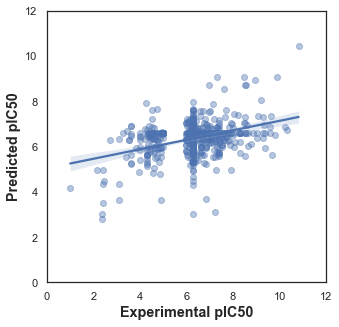

In [258]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show